# 피보험자 데이터 전처리

In [215]:
df = pd.read_csv('피보험자.csv')
df.head()

,Unnamed: 0,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,...,전북특별자치도 임실군,전북특별자치도 순창군,전북특별자치도 고창군,전북특별자치도 부안군,인천광역시 미추홀구,경기도 안양시,경기도 부천시,충청북도 청주시,대구광역시 군위군,경상북도 포항시
0,2011-06-01,198221,455847,114334,107389,55112,67978,33122,38891,20738,...,3645,3041,5446,6147,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-07-01,198430,461766,115596,108393,54970,66899,32820,36554,20746,...,3606,3090,5437,6131,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-08-01,200039,463087,117269,108849,55035,67172,32829,36719,20722,...,3609,3076,5416,6077,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-09-01,200654,464014,117002,109345,55004,67515,33118,37320,21009,...,3642,3105,5341,6138,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-10-01,201370,464848,117439,108978,56109,68623,33399,39721,21430,...,3727,3120,5463,6130,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
# 첫 번째 컬럼의 이름을 '월'로 변경
df.rename(columns={df.columns[0]: '월'}, inplace=True)

# 결과 확인
df.head()

,월,서울특별시 종로구,서울특별시 중구,서울특별시 용산구,서울특별시 성동구,서울특별시 광진구,서울특별시 동대문구,서울특별시 중랑구,서울특별시 성북구,서울특별시 강북구,...,전북특별자치도 임실군,전북특별자치도 순창군,전북특별자치도 고창군,전북특별자치도 부안군,인천광역시 미추홀구,경기도 안양시,경기도 부천시,충청북도 청주시,대구광역시 군위군,경상북도 포항시
0,2011-06-01,198221,455847,114334,107389,55112,67978,33122,38891,20738,...,3645,3041,5446,6147,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-07-01,198430,461766,115596,108393,54970,66899,32820,36554,20746,...,3606,3090,5437,6131,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-08-01,200039,463087,117269,108849,55035,67172,32829,36719,20722,...,3609,3076,5416,6077,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-09-01,200654,464014,117002,109345,55004,67515,33118,37320,21009,...,3642,3105,5341,6138,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-10-01,201370,464848,117439,108978,56109,68623,33399,39721,21430,...,3727,3120,5463,6130,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
# '인천광역시 남구'와 '인천광역시 미추홀구' 열의 값을 합침
df['인천광역시 미추홀구'] = df['인천광역시 미추홀구'].fillna(0) + df['인천광역시 남구'].fillna(0)

# '인천광역시 남구' 열을 삭제
df.drop(columns=['인천광역시 남구'], inplace=True)

# 결과 
df['인천광역시 미추홀구'].head()

0    45786.0
1    45072.0
2    44978.0
3    45468.0
4    46504.0
Name: 인천광역시 미추홀구, dtype: float64

In [220]:
# '인천광역시 남구'와 '인천광역시 미추홀구' 열의 값을 합침
df['대구광역시 군위군'] = df['경상북도 군위군'].fillna(0) + df['대구광역시 군위군'].fillna(0)

# '인천광역시 남구' 열을 삭제
df.drop(columns=['경상북도 군위군'], inplace=True)

# 결과 
df['대구광역시 군위군'].head()

0    3896.0
1    3889.0
2    3965.0
3    3962.0
4    3949.0
Name: 대구광역시 군위군, dtype: float64

In [226]:
# 열 개수 확인

len(df.columns)

265

In [227]:
# '경기도 부천시'가 포함된 열을 모두 삭제
columns_to_drop = [col for col in df.columns if '경기도 부천시' in col]
df.drop(columns=columns_to_drop, inplace=True)

# null 값을 포함하는 열을 모두 삭제
df.dropna(axis=1, inplace=True)

In [228]:
# 열 개수 확인
len(df.columns)

261

In [234]:
# 모든 값이 0이 아닌 열만 선택
df = df.loc[:, (df != 0).all(axis=0)]
# 열 개수 확인
len(df.columns)

250

In [235]:
# 데이터 저장
df.to_csv('피보험자.csv', index = False)

# 피보험자 수 예측(앞 부분)

## 거제시 예시

Epoch 1/50


C:\Download\anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0532
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0018
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010    
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 13/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0013
Epoch 14/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.5456e-04
Epoch 15/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss:

C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPy

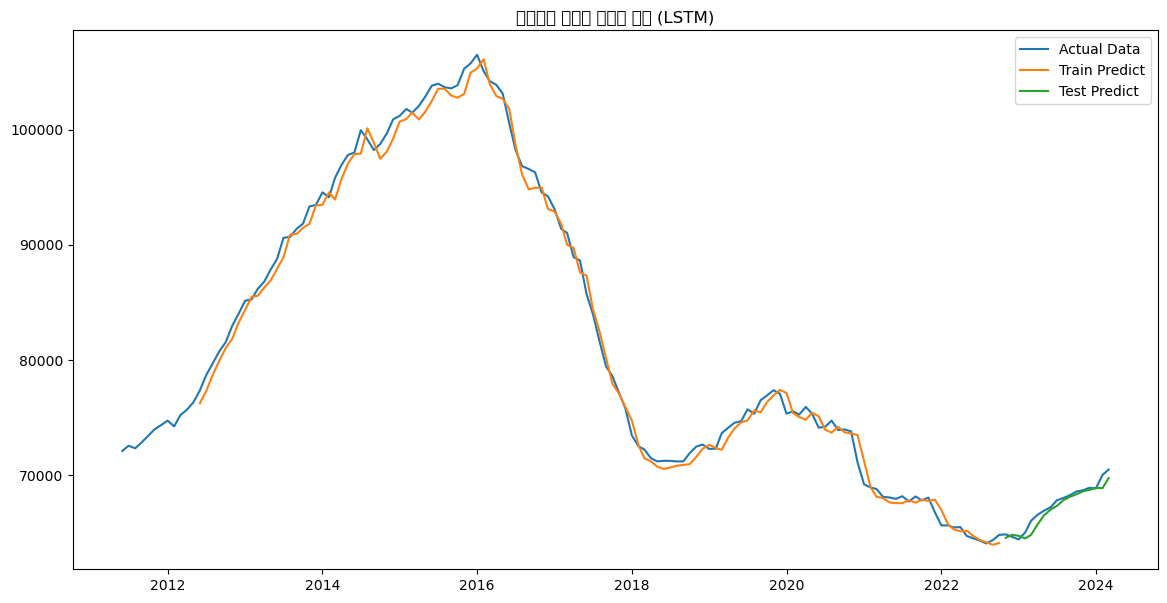

(898.1619420253692, 549.7079816256427)

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
file_path = '피보험자.csv'
data = pd.read_csv(file_path)

# Selecting '서울특별시 종로구' column and converting '월' column to datetime
data['월'] = pd.to_datetime(data['월'])
data.set_index('월', inplace=True)
y = data['경상남도 거제시']

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert the dataset into a suitable shape for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 12
X, Y = create_dataset(y_scaled, time_step)

# Split the data into training and testing sets
train_size = 125
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual Data')
plt.plot(y.index[time_step:train_size + time_step], train_predict, label='Train Predict')
plt.plot(y.index[train_size + time_step:], test_predict, label='Test Predict')
plt.legend()
plt.title('경상남도 거제시 시계열 예측 (LSTM)')
plt.show()

train_rmse, test_rmse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Download\anaconda\lib\site-packages\IPy

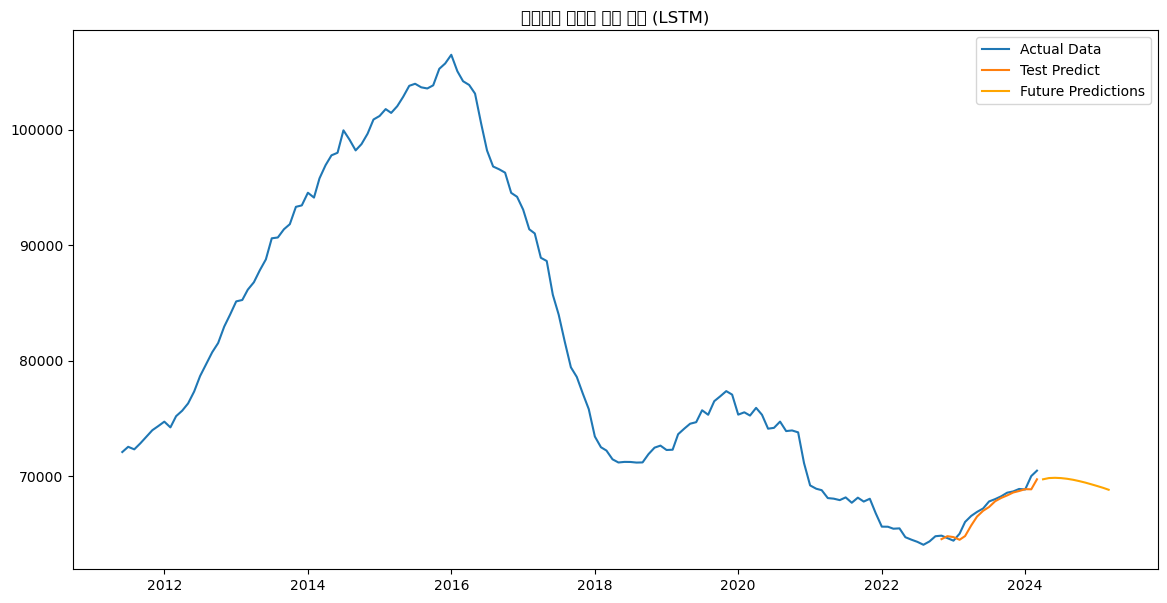

In [11]:
# 예측할 스텝 수 정의
future_steps = 12  # 1년 동안 예측

# 테스트 세트의 마지막 time_step 데이터 포인트를 미래 예측의 시작점으로 사용
last_train_batch = X_test[-1]

# 미래 예측을 저장할 리스트 생성
future_predictions = []

for _ in range(future_steps):
    # last_train_batch를 LSTM 입력 형태에 맞게 reshape
    last_train_batch = last_train_batch.reshape((1, time_step, 1))
    
    # 다음 값을 예측
    next_prediction = model.predict(last_train_batch)
    
    # 예측값을 future_predictions 리스트에 추가
    future_predictions.append(next_prediction[0, 0])
    
    # last_train_batch를 업데이트: 첫 번째 값을 제거하고 새로운 예측값을 추가
    next_prediction = next_prediction.reshape((1, 1, 1))
    last_train_batch = np.append(last_train_batch[:, 1:, :], next_prediction, axis=1)

# 역정규화
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# 미래 예측을 위한 날짜 범위 생성
last_date = y.index[-1]
future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='MS')[1:]

# 미래 예측을 저장할 데이터프레임 생성
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Future Predictions'])

# 거제시 결과 확인 (예시)
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual Data')
plt.plot(y.index[train_size + time_step:], test_predict, label='Test Predict')
plt.plot(future_df.index, future_df['Future Predictions'], label='Future Predictions', color='orange')
plt.legend()
plt.title('경상남도 거제시 미래 예측 (LSTM)')
plt.show()


## 전체 예측

In [151]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf

# 데이터 불러오기
file_path = '피보험자 (2).csv'
data = pd.read_csv(file_path)

#  '월' column 날짜 형식으로 변경
data['월'] = pd.to_datetime(data['월'])
data.set_index('월', inplace=True)

# 데이터셋 생성 함수
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# 파라미터 지정
time_step = 12
train_size = 125
epochs = 50
batch_size = 1
future_steps = 12  # 1년간 예측
columns = ['서울특별시 종로구', '서울특별시 중구', '서울특별시 용산구', '서울특별시 성동구', '서울특별시 광진구',
           '서울특별시 동대문구', '서울특별시 중랑구', '서울특별시 성북구', '서울특별시 강북구', '서울특별시 도봉구',
           '서울특별시 노원구', '서울특별시 은평구', '서울특별시 서대문구', '서울특별시 마포구', '서울특별시 양천구',
           '서울특별시 강서구', '서울특별시 구로구', '서울특별시 금천구', '서울특별시 영등포구', '서울특별시 동작구',
           '서울특별시 관악구', '서울특별시 서초구', '서울특별시 강남구', '서울특별시 송파구', '서울특별시 강동구',
           '부산광역시 중구', '부산광역시 서구', '부산광역시 동구', '부산광역시 영도구', '부산광역시 부산진구',
           '부산광역시 동래구', '부산광역시 남구', '부산광역시 북구', '부산광역시 해운대구', '부산광역시 사하구',
           '부산광역시 금정구', '부산광역시 강서구', '부산광역시 연제구', '부산광역시 수영구', '부산광역시 사상구',
           '부산광역시 기장군', '대구광역시 중구', '대구광역시 동구', '대구광역시 서구', '대구광역시 남구',
           '대구광역시 북구', '대구광역시 수성구', '대구광역시 달서구', '대구광역시 달성군', '인천광역시 중구',
           '인천광역시 동구', '인천광역시 연수구', '인천광역시 남동구', '인천광역시 부평구', '인천광역시 계양구',
           '인천광역시 서구', '인천광역시 강화군', '인천광역시 옹진군', '광주광역시 동구', '광주광역시 서구',
           '광주광역시 남구', '광주광역시 북구', '광주광역시 광산구', '대전광역시 동구', '대전광역시 중구', '대전광역시 서구', 
           '대전광역시 유성구', '대전광역시 대덕구', '울산광역시 중구', '울산광역시 남구', '울산광역시 동구', 
           '울산광역시 북구', '울산광역시 울주군', '세종특별자치시', '경기도 수원시 장안구', '경기도 수원시 권선구',
           '경기도 수원시 팔달구', '경기도 수원시 영통구', '경기도 성남시 수정구', '경기도 성남시 중원구', 
           '경기도 성남시 분당구','경기도 의정부시', '경기도 안양시 만안구', '경기도 안양시 동안구', '경기도 광명시', 
           '경기도 평택시', '경기도 동두천시', '경기도 안산시', '경기도 안산시 상록구', '경기도 안산시 단원구', 
           '경기도 고양시 덕양구', '경기도 고양시 일산동구', '경기도 고양시 일산서구', '경기도 과천시', '경기도 구리시', 
           '경기도 남양주시', '경기도 오산시', '경기도 시흥시', '경기도 군포시', '경기도 의왕시', '경기도 하남시', 
           '경기도 용인시', '경기도 용인시 처인구', '경기도 용인시 기흥구', '경기도 용인시 수지구', '경기도 파주시', 
           '경기도 이천시', '경기도 안성시', '경기도 김포시', '경기도 화성시', '경기도 광주시', '경기도 양주시', 
           '경기도 포천시','경기도 여주시', '경기도 연천군', '경기도 가평군', '경기도 양평군', '충청북도 청주시 상당구', 
           '충청북도 청주시 흥덕구', '충청북도 청주시 청원구', '충청북도 충주시', '충청북도 제천시', '충청북도 보은군', 
           '충청북도 옥천군', '충청북도 영동군']

# 결과 리스트
results = []

# 미래 예측 결과 담을 데이터프레임
future_predictions_df = pd.DataFrame()

# 각 컬럼들을 돌면서 (지역별로) 예측 진행
for column in columns:
    print(f"Processing {column}")
    
    y = data[column]

    # 정규화
    scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # LSTM 사용하기 위해 데이터셋 생성
    X, Y = create_dataset(y_scaled, time_step)

    # train test split
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    # LSTM 사용을 위해 데이터 형식 변환
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # LSTM 생성
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 모델 학습
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # 예측
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # 역정규화
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
    Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

    # 평가지표
    train_mse = mean_squared_error(Y_train, train_predict)
    test_mse = mean_squared_error(Y_test, test_predict)
    train_mae = mean_absolute_error(Y_train, train_predict)
    test_mae = mean_absolute_error(Y_test, test_predict)
    train_r2 = r2_score(Y_train, train_predict)
    test_r2 = r2_score(Y_test, test_predict)

    # 평가지표 저장
    results.append({
        'Region': column,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R2': train_r2,
        'Test R2': test_r2
    })

    # 미래 예측(1년치)
    last_train_batch = X_test[-1]
    future_predictions = []

    for _ in range(future_steps):
        last_train_batch = last_train_batch.reshape((1, time_step, 1))
        next_prediction = model.predict(last_train_batch)
        future_predictions.append(next_prediction[0, 0])
        next_prediction = next_prediction.reshape((1, 1, 1))
        last_train_batch = np.append(last_train_batch[:, 1:, :], next_prediction, axis=1)

    # 역정규화
    future_predictions = np.array(future_predictions).reshape(-1, 1)
    future_predictions = scaler.inverse_transform(future_predictions)

    # '월'행 생성
    last_date = y.index[-1]
    future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='MS')[1:]

    # 데이터프레임 생성
    future_df = pd.DataFrame(future_predictions, index=future_dates, columns=[f'{column} Future Predictions'])

    # 지역별 결과 데이터프레임에 합치기
    future_predictions_df = pd.concat([future_predictions_df, future_df], axis=1)

# 평가지표 결과 데이터프레임화
results_df = pd.DataFrame(results)

# CSV 저장
results_df.to_csv('model_evaluation_metrics.csv', index=False)
future_predictions_df.to_csv('future_predictions.csv')


Processing 서울특별시 종로구
1/1 [==============================] - 0s 16ms/step
Processing 서울특별시 중구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 용산구
1/1 [==============================] - 0s 13ms/step
Processing 서울특별시 성동구
1/1 [==============================] - 0s 13ms/step
Processing 서울특별시 광진구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 동대문구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 중랑구
1/1 [==============================] - 0s 13ms/step
Processing 서울특별시 성북구
1/1 [==============================] - 0s 13ms/step
Processing 서울특별시 강북구
1/1 [==============================] - 0s 60ms/step
Processing 서울특별시 도봉구
1/1 [==============================] - 0s 13ms/step
Processing 서울특별시 노원구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 은평구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 서대문구
1/1 [==============================] - 0s 14ms/step
Processing 서울특별시 마포구
1/1 [========================

In [153]:
# 성능 평가 결과
results_df.describe()

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
count,1.250000e+02,1.250000e+02,125.000000,125.000000,125.000000,125.000000
mean,1.566861e+06,4.500678e+06,671.415653,1068.770249,0.968700,-2.568380
std,3.378516e+06,1.749013e+07,629.057847,1487.265266,0.040065,21.435329
min,1.172433e+03,3.599739e+02,17.991819,18.903830,0.746162,-237.667912
25%,1.346162e+05,1.571538e+05,276.996484,346.977999,0.962799,-0.591495
50%,4.347817e+05,4.917371e+05,505.253906,571.378447,0.982842,0.321952
75%,9.363695e+05,1.654672e+06,740.690187,1154.374540,0.991684,0.585787
max,2.183102e+07,1.659431e+08,3285.771500,11802.919118,0.997863,0.889338


In [164]:
# 데이터 반올림
future_predictions_df = pd.read_csv('future_predictions.csv')

In [168]:
future_predictions_df = future_predictions_df.round()

In [169]:
future_predictions_df

,Unnamed: 0,서울특별시 종로구 Future Predictions,서울특별시 중구 Future Predictions,서울특별시 용산구 Future Predictions,서울특별시 성동구 Future Predictions,서울특별시 광진구 Future Predictions,서울특별시 동대문구 Future Predictions,서울특별시 중랑구 Future Predictions,서울특별시 성북구 Future Predictions,서울특별시 강북구 Future Predictions,...,경기도 가평군 Future Predictions,경기도 양평군 Future Predictions,충청북도 청주시 상당구 Future Predictions,충청북도 청주시 흥덕구 Future Predictions,충청북도 청주시 청원구 Future Predictions,충청북도 충주시 Future Predictions,충청북도 제천시 Future Predictions,충청북도 보은군 Future Predictions,충청북도 옥천군 Future Predictions,충청북도 영동군 Future Predictions
0,2024-04-01,262828.0,486184.0,157469.0,165890.0,64732.0,68224.0,44781.0,56025.0,30673.0,...,13193.0,17473.0,30251.0,84270.0,60161.0,54918.0,27309.0,8711.0,12152.0,9275.0
1,2024-05-01,261226.0,486782.0,158803.0,166780.0,63373.0,68423.0,43951.0,56653.0,30843.0,...,13557.0,17428.0,30521.0,82583.0,61045.0,55003.0,26678.0,8681.0,12109.0,9290.0
2,2024-06-01,259800.0,487147.0,160106.0,167496.0,61815.0,68394.0,43197.0,56735.0,30960.0,...,13906.0,17400.0,30173.0,81068.0,61558.0,55066.0,26275.0,8626.0,12088.0,9239.0
3,2024-07-01,258559.0,487431.0,161357.0,168163.0,61046.0,68249.0,42721.0,56364.0,31008.0,...,14127.0,17327.0,29858.0,79792.0,61447.0,55125.0,26429.0,8598.0,12068.0,9214.0
4,2024-08-01,257521.0,487656.0,162544.0,168777.0,60834.0,68157.0,42460.0,55971.0,30980.0,...,14218.0,17219.0,29709.0,78710.0,60819.0,55189.0,26670.0,8583.0,12050.0,9228.0
5,2024-09-01,256682.0,487840.0,163655.0,169348.0,60708.0,68216.0,42329.0,55903.0,30913.0,...,14120.0,17109.0,29712.0,77784.0,60162.0,55255.0,26712.0,8570.0,12029.0,9253.0
6,2024-10-01,256027.0,487989.0,164678.0,169882.0,60306.0,68381.0,42254.0,56132.0,30820.0,...,13816.0,17023.0,29767.0,76987.0,59946.0,55324.0,26634.0,8557.0,12003.0,9282.0
7,2024-11-01,255534.0,488100.0,165603.0,170392.0,59687.0,68532.0,42176.0,56372.0,30718.0,...,13420.0,16975.0,29801.0,76299.0,60260.0,55393.0,26587.0,8548.0,11975.0,9307.0
8,2024-12-01,255180.0,488170.0,166420.0,170882.0,59169.0,68580.0,42059.0,56358.0,30631.0,...,13089.0,16966.0,29785.0,75703.0,60869.0,55458.0,26603.0,8543.0,11944.0,9331.0
9,2025-01-01,254938.0,488203.0,167121.0,171360.0,58935.0,68521.0,41890.0,56133.0,30579.0,...,12984.0,16990.0,29743.0,75181.0,61401.0,55520.0,26629.0,8540.0,11914.0,9355.0


In [170]:
# 숫자형 열만 선택
numeric_columns = future_predictions_df.select_dtypes(include=['float32', 'int64']).columns

# 숫자형 열에서 마이너스 값을 모두 0으로 변경
future_predictions_df[numeric_columns] = future_predictions_df[numeric_columns].applymap(lambda x: max(x, 0))

In [212]:
future_predictions_df.to_csv('future_predictions.csv')